In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier


In [2]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

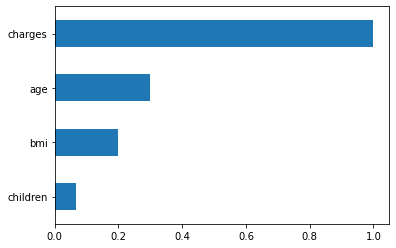

In [4]:
data.corr()["charges"].sort_values().plot.barh()

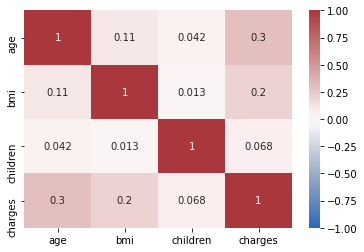

In [5]:
matrix = data.corr()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [6]:
sex = data['sex'].unique()
sex

array(['female', 'male'], dtype=object)

In [7]:
age = data['age'].unique()
age

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [8]:
region = data['region'].unique()
region

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
smoker = data['smoker'].unique()
smoker

array(['yes', 'no'], dtype=object)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data.values[:,:-1], data.values[:,-1], test_size=0.2, random_state = 0)

In [11]:
print(y_train)

[40182.246 1137.4697 38511.6283 ... 5415.6612 1646.4297 4766.022]


In [12]:
ct = ColumnTransformer( [('ordinal', OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value = -1), [1,4,5] )] )
ct

ColumnTransformer(transformers=[('ordinal',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 [1, 4, 5])])

In [13]:
x_train = ct.fit_transform(x_train)
x_train

array([[1., 1., 3.],
       [1., 0., 2.],
       [0., 1., 0.],
       ...,
       [1., 0., 2.],
       [1., 0., 1.],
       [0., 0., 3.]])

In [14]:
x_test = ct.transform(x_test)

In [15]:
from sklearn.ensemble import RandomForestRegressor
Rf_clf = RandomForestRegressor(random_state=0)
Rf_clf.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [16]:
predictions = Rf_clf.predict(x_test)
predictions[:3]

array([ 7721.84400634,  8040.12342056, 28691.26212277])

In [17]:
(predictions == y_test).sum()/len(y_test)

0.0

In [18]:
from sklearn.ensemble import AdaBoostRegressor

In [19]:
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(x_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [20]:
pred = regr.predict(x_test)
pred[:3]

array([ 7944.38060918,  8922.41117725, 30183.56777265])

In [21]:
sco = regr.score(x_train,y_train)
sco

0.608136064439882